In [40]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import os
import sys
import re

from matplotlib import rcParams
from matplotlib.cm import get_cmap


In [41]:
## Font
#rcParams['font.family'] = 'Times New Roman'
rcParams['font.family']= 'serif'
rcParams['font.serif']= ['Times New Roman', 'Times', 'DejaVu Serif']
rcParams['font.size'] = 14

## Lines
rcParams['lines.solid_joinstyle'] = 'miter'  # other options: 'round' or 'bevel'
rcParams['lines.antialiased'] = True  # turning on/off of antialiasing for sharper edges
rcParams['lines.linewidth'] = 1.25

## Legend
rcParams['legend.loc'] = 'upper left'
rcParams['legend.frameon'] = False

## Ticks
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True

rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Resolution
rcParams['figure.dpi'] = 150

## Colors
### cmaps
cm_inferno = get_cmap("inferno")
cm_viridis = get_cmap("viridis")
cm_seismic = get_cmap("seismic")
cm_jet = get_cmap("jet")
cm_tab10 = get_cmap("tab10")
### Palettes from color-hex.com/
c_google = ['#008744', '#0057e7', '#d62d20', '#ffa700'] # G, B, R, Y # https://www.color-hex.com/color-palette/1872
c_twilight = ['#363b74', '#673888', '#ef4f91', '#c79dd7', '#4d1b7b'] # https://www.color-hex.com/color-palette/809

/tmp/ipykernel_28260/1093720948.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm_inferno = get_cmap("inferno")
/tmp/ipykernel_28260/1093720948.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm_viridis = get_cmap("viridis")
/tmp/ipykernel_28260/1093720948.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm_seismic = get_cmap("seismic")
/tmp/ipykernel_28260/1093720948.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Mat

# Energies

In [42]:
dir = "/home/alina/Documents/SWAP/"

In [43]:
def LoadEnergy(filename,dir):
    # dir = #"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"{filename}.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "n",
                "energy",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [44]:
def LoadExpectations1(filename,dir):
    # dir = "/home/alina/Documents/SWAP-results/Time_evolution/080125/noSO/RUN_Bz_0.01/"#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"{filename}.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "n",
                "sx",
                "sy",
                "sz",
                "dxy_up",
                "dxy_down",
                "dxz_up",
                "dxz_down",
                "dyz_up",
                "dyz_down",
                "parity",
                "x",
                "y",
                "sz_L",
                "sz_R",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [45]:
def LoadExpectations2(filename,dir):
    # dir = "/home/alina/Documents/SWAP-results/Time_evolution/080125/noSO/RUN_Bz_0.01/"#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"{filename}.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "n",
                "x",
                "sx",
                "sy",
                "sz",
                "dxy_up",
                "dxy_down",
                "dxz_up",
                "dxz_down",
                "dyz_up",
                "dyz_down",
                "parity",
                "sz_L",
                "sz_R",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [46]:
e1 = LoadEnergy('Energies1', dir)
e2 = LoadEnergy('Energies2', dir)
exp1 = LoadExpectations1('Expectations_1',dir) 
exp2 = LoadExpectations2('Expectations_2',dir) 

In [47]:
e1

,n,energy
0,1,-73.615069
1,2,-73.615052
2,3,-73.338390
3,4,-73.338373
4,5,-55.096054
5,6,-55.096036
6,7,-54.760326
7,8,-54.760308
8,9,-54.585123
9,10,-54.585106


In [48]:
e2

,n,energy
0,1,-146.045778
1,2,-146.024413
2,3,-146.024396
3,4,-146.024379
4,5,-142.356365
5,6,-142.334347
6,7,-127.575287
7,8,-127.575270
8,9,-127.575252
9,10,-127.519526


In [49]:
exp1

,n,sx,sy,sz,dxy_up,dxy_down,dxz_up,dxz_down,dyz_up,dyz_down,parity,x,y,sz_L,sz_R
0,1,2.758359e-07,1.530221e-07,-1.0,2.487529e-14,1.000000e+00,7.760089e-30,7.892212e-30,7.343558e-30,7.366969e-30,-1.0,-7.916477e-10,-2.030429e-14,-0.499627,-0.500373
1,2,-2.754138e-07,-1.565362e-07,1.0,1.000000e+00,2.508908e-14,7.890807e-30,7.293298e-30,8.418656e-30,7.756623e-30,1.0,8.102358e-10,-5.109098e-13,0.499627,0.500373
2,3,-1.091487e-07,6.865184e-08,-1.0,4.156631e-15,1.000000e+00,1.217921e-29,1.289769e-29,1.251766e-29,1.270700e-29,1.0,8.103959e-10,-1.954911e-13,-0.500000,-0.500000
3,4,1.076858e-07,-6.871569e-08,1.0,1.000000e+00,4.079520e-15,5.945184e-30,6.098534e-30,5.284059e-30,5.734298e-30,-1.0,-7.881640e-10,6.745672e-13,0.500000,0.500000
4,5,7.952276e-08,-1.101133e-07,-1.0,4.612202e-15,1.000000e+00,1.608561e-28,1.298414e-28,7.679164e-29,9.593055e-29,1.0,1.108682e-10,8.149211e-13,-0.499515,-0.500485
5,6,-7.748453e-08,1.006116e-07,1.0,1.000000e+00,4.031639e-15,2.254461e-28,1.763859e-28,8.447923e-29,1.162607e-28,-1.0,1.070769e-10,-5.913047e-13,0.499515,0.500485
6,7,-6.342975e-08,8.925532e-08,-1.0,2.997461e-15,1.000000e+00,2.230185e-29,2.633145e-29,2.220297e-29,4.092153e-29,-1.0,-1.336906e-10,2.316745e-14,-0.500000,-0.500000
7,8,6.360708e-08,-8.451838e-08,1.0,1.000000e+00,2.797304e-15,2.168104e-29,2.514904e-29,2.045501e-29,2.096696e-29,1.0,-1.185682e-10,-7.975119e-13,0.500000,0.500000
8,9,7.401761e-08,-5.184026e-08,-1.0,2.041505e-15,1.000000e+00,6.172080e-29,4.459876e-29,2.653609e-29,5.195327e-29,-1.0,-4.022449e-12,-1.214203e-12,-0.497307,-0.502693
9,10,-6.921054e-08,5.096627e-08,1.0,1.000000e+00,1.846915e-15,6.355272e-29,5.576144e-29,4.621740e-29,6.558024e-29,1.0,4.001730e-12,1.044508e-12,0.497307,0.502693


In [50]:
exp2

,n,x,sx,sy,sz,dxy_up,dxy_down,dxz_up,dxz_down,dyz_up,dyz_down,parity,sz_L,sz_R
0,1,5.308057e-13,-3.741655e-10,-2.055998e-09,-3.389193e-15,1.000000e+00,1.000000e+00,1.670697e-29,1.680477e-29,1.662954e-29,1.653478e-29,-1.0,-1.354361e-10,1.354334e-10
1,2,5.012525e-13,5.617665e-05,1.912057e-04,-2.000000e+00,4.951551e-09,2.000000e+00,1.994466e-29,2.079377e-29,1.986310e-29,2.007842e-29,-1.0,-9.996455e-01,-1.000354e+00
2,3,5.417734e-13,-3.603109e-08,3.871736e-09,-4.594936e-13,1.000000e+00,1.000000e+00,1.689498e-29,1.709744e-29,1.678564e-29,1.678867e-29,1.0,1.351267e-10,-1.355853e-10
3,4,5.815744e-13,-5.614737e-05,-1.912141e-04,2.000000e+00,2.000000e+00,4.951356e-09,1.384529e-29,1.340111e-29,1.370818e-29,1.349893e-29,-1.0,9.996455e-01,1.000354e+00
4,5,-4.494018e-10,-5.151672e-10,-1.789810e-09,-3.568698e-15,1.000000e+00,1.000000e+00,1.728096e-29,1.742913e-29,1.695809e-29,1.704480e-29,1.0,-8.268383e-15,5.640014e-15
5,6,4.410545e-10,-6.607352e-10,-1.523406e-09,-3.776761e-15,1.000000e+00,1.000000e+00,1.750087e-29,1.774499e-29,1.714236e-29,1.734344e-29,-1.0,-2.247700e-15,-2.552839e-16
6,7,-9.651187e-13,-9.618027e-05,5.310363e-04,-2.000000e+00,3.640017e-08,2.000000e+00,1.254541e-28,1.060344e-28,6.823201e-29,8.732550e-29,-1.0,-9.994402e-01,-1.000560e+00
7,8,1.423823e-14,-1.288931e-08,5.004551e-08,1.490976e-11,1.000000e+00,1.000000e+00,1.462917e-28,1.203293e-28,6.977216e-29,9.003009e-29,1.0,-2.671511e-11,4.162471e-11
8,9,8.944213e-13,9.619390e-05,-5.311002e-04,2.000000e+00,2.000000e+00,3.640797e-08,1.671294e-28,1.346241e-28,7.131232e-29,9.273468e-29,-1.0,9.994402e-01,1.000560e+00
9,10,-3.136612e-13,2.936119e-10,-2.127656e-09,-1.380050e-15,1.000000e+00,1.000000e+00,1.173756e-28,9.899360e-29,5.986117e-29,7.753853e-29,-1.0,3.380303e-11,-3.380452e-11


# Wavefunction

In [51]:
def LoadSingleElectronPsi(n,dir):
    # dir = "/home/alina/Documents/SWAP-results/Time_evolution/080125/noSO/RUN_Bz_0.01/"#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"Psi_LR_n{n}.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "kx",
                "ky",
                "rePsi_xy_up",
                "imPsi_xy_up",
                "rePsi_xy_down",
                "imPsi_xy_down",
                "rePsi_xz_up",
                "imPsi_xz_up",
                "rePsi_xz_down",
                "imPsi_xz_down",
                "rePsi_yz_up",
                "imPsi_yz_up",
                "rePsi_yz_down",
                "imPsi_yz_down",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [52]:
def PlotSingleElectronPsi(psi1,n):
    # liczba orbitali (xy, xz, yz)
    norb = 3  
    
    density = np.zeros(len(psi1))
    for i in range(norb):
        re_up = psi1.iloc[:, 2 + i*4]
        im_up = psi1.iloc[:, 3 + i*4]
        re_down = psi1.iloc[:, 4 + i*4]
        im_down = psi1.iloc[:, 5 + i*4]
        density += re_up**2 + im_up**2 + re_down**2 + im_down**2

    #plt.figure(figsize=(6,5))
    plt.scatter(psi1["kx"], psi1["ky"], c=density, cmap="inferno", s=30)
    plt.colorbar(label=r"$|\psi(k_x, k_y)|^2$")
    plt.axis('equal')

    plt.xlabel(r"$k_x$")
    plt.ylabel(r"$k_y$")
    plt.tight_layout()
    # plt.savefig(f"Plots/Psi_LR{n}.png", format='png', dpi=300)
    plt.show()

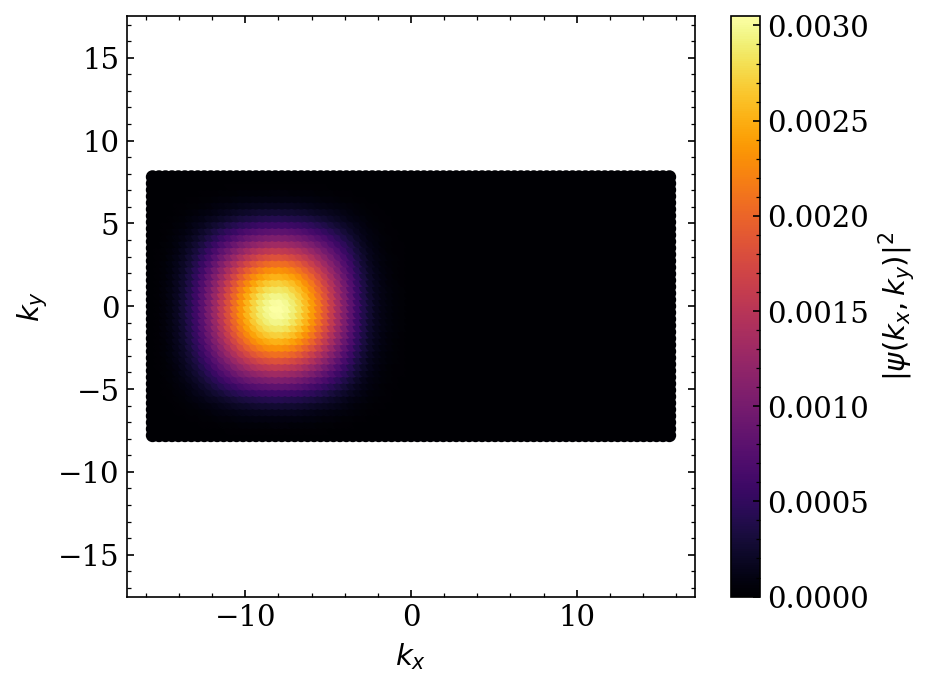

In [53]:
n = 1
psi1 = LoadSingleElectronPsi(n,dir)
PlotSingleElectronPsi(psi1,n)

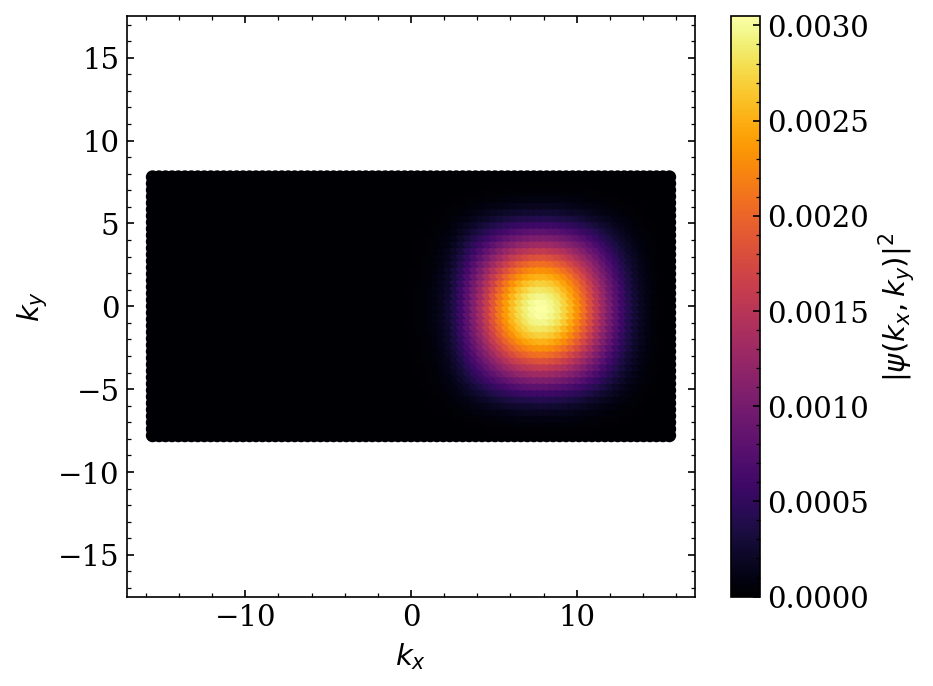

In [54]:
n = 2
psi1 = LoadSingleElectronPsi(n,dir)
PlotSingleElectronPsi(psi1,n)

# Potential

In [55]:
def LoadPotential(dir):
    # dir = ""#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"potential.dat"
        # dir + "OutputData", f"spin_density.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "kx",
                "ky",
                "potential",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [56]:
def PlotPotential(potential):
       
    #plt.figure(figsize=(6,5))
    plt.scatter(potential["kx"], potential["ky"], c=potential["potential"], cmap="inferno", s=30)
    plt.colorbar(label="V [eV]")
    plt.axis('equal')

    plt.xlabel(r"$k_x$")
    plt.ylabel(r"$k_y$")
    plt.savefig(f"Plots/potential.png", format='png', dpi=300)
    plt.show()

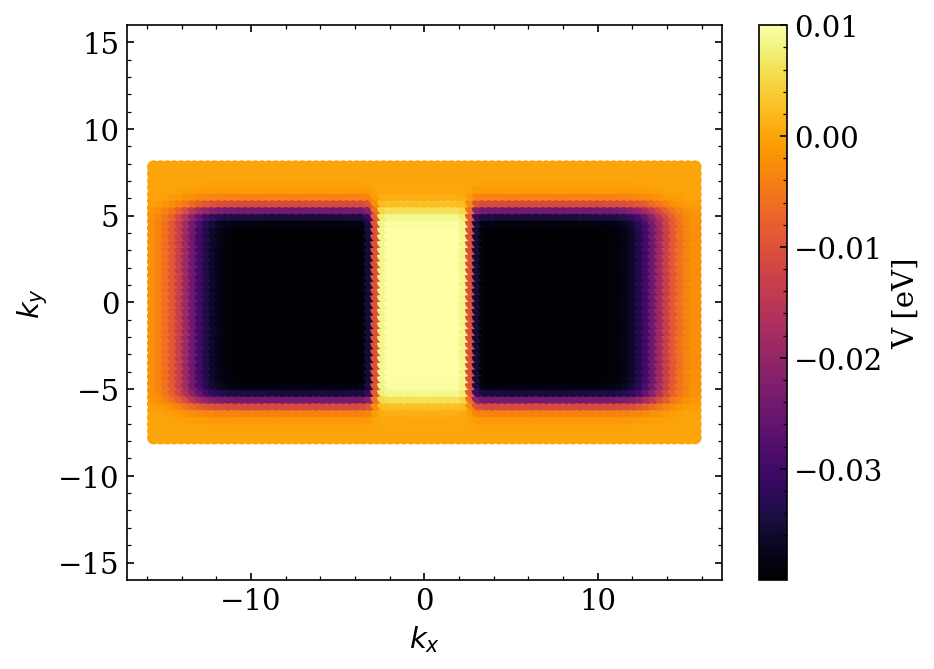

In [57]:
potential = LoadPotential(dir)
PlotPotential(potential)

# Spin SWAP

In [58]:
def LoadSpinTime(filename,dir):
    # dir = ""#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData/" + filename
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "t",
                "sx_L",
                "sx_R",
                "sy_L",
                "sy_R",
                "sz_L",
                "sz_R",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

<>:12: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
<>:12: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
/tmp/ipykernel_28260/548364979.py:12: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
  plt.ylabel('$S_z$ [$\hbar$/2]')


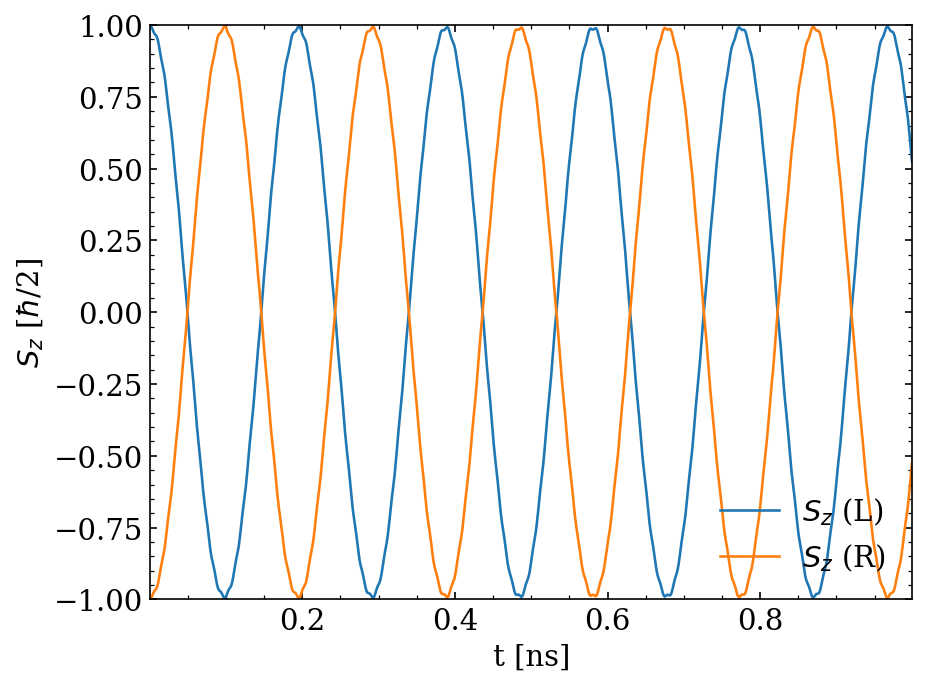

In [60]:
# spin = LoadSpinTime("Spin_time_evolution.dat")
spin = LoadSpinTime("Spin_time_evolution.dat",dir)
# plt.plot(spin.iloc[:,0], spin.iloc[:,1], label='$S_x$ (L)')
# plt.plot(spin.iloc[:,0], spin.iloc[:,2], label='$S_x$ (R)')
# plt.plot(spin.iloc[:,0], spin.iloc[:,3], label='$S_y$ (L)')
# plt.plot(spin.iloc[:,0], spin.iloc[:,4], label='$S_y$ (R)')
plt.plot(spin.iloc[:,0], spin.iloc[:,5], label='$S_z$ (L)')
plt.plot(spin.iloc[:,0], spin.iloc[:,6], label='$S_z$ (R)')
plt.ylim(-1,1)
plt.xlim(spin.iloc[0,0],spin.iloc[-1,0])
plt.xlabel('t [ns]')
plt.ylabel('$S_z$ [$\hbar$/2]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(f"Plots/spin_swap.png", format='png', dpi=300)

# Spin density

In [37]:
def LoadSpinDensity(dir):
    # dir = ""#"/home/ania/Documents/Doktorat/test_results/spektrum/RUN_Bz_1.0/"
    psiPath = os.path.join(
        dir + "OutputData", f"spin_density.dat"
    )
    #print(f'Loading Psi_1_n{n}.dat')
    if os.path.exists(psiPath):
        psi1 = pd.read_fwf(
            psiPath,
            skiprows=1,
            infer_nrows=100,
            names=[
                "kx",
                "ky",
                "density",
            ],
        )
    else:
        print("File does not exists, skipping: ", psiPath)
        
    return psi1

In [38]:
def PlotSpinDensity(density):
    plt.scatter(
        potential["kx"], 
        potential["ky"], 
        c=potential["density"], 
        cmap="seismic",   # -1 niebieski, 0 biały, +1 czerwony
        s=30,
        vmin=-1,          # minimalna wartość koloru
        vmax=1            # maksymalna wartość koloru
    )
    plt.colorbar(label="V [eV]")
    plt.axis('equal')
    plt.xlabel(r"$k_x$")
    plt.ylabel(r"$k_y$")
    plt.savefig("Plots/density.png", format='png', dpi=300)
    plt.show()

In [39]:
density = LoadSpinDensity(dir)
PlotSpinDensity(density)

File does not exists, skipping:  /home/alina/Documents/SWAP/OutputData/spin_density.dat


UnboundLocalError: cannot access local variable 'psi1' where it is not associated with a value